In [2]:
import numpy as np
import scipy.ndimage as sn
import scipy.signal as ss
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage import morphology as mp
from skimage import transform
import math
from skimage.color import rgb2hsv, hsv2rgb
from skimage.util import random_noise as rn
from PIL.Image import open as imread
from PIL import ImageOps as Iops
import time
import cv2 as cv2

In [3]:
def showG(im, boundaries = True):
    if np.average(im) < 1:
        im = im*255
    if boundaries:
        plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    else:    
        plt.imshow(im, cmap='gray')
    return plt.show()


In [7]:
im = np.array([[0,0,0,0,0],
               [0,0,0,0,0],
               [1,1,0,0,0],
               [1,1,0,1,0],
               [0,0,0,0,0]],dtype="uint8")
k = np.array([[-1,-1,-1],
              [ 0, 1,-1],
              [ 0, 0,-1]])

out = cv2.morphologyEx(im, cv2.MORPH_HITMISS, k)
print(out)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]


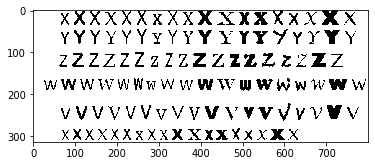

In [4]:
im3 = imread('digits_binary_inv.png')
#g3 = Iops.grayscale(im3)
A3 = np.round(np.array(im3) / np.max(np.array(im3))).astype(np.int)
showG(A3)

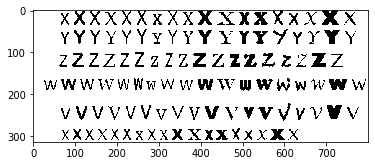

In [5]:
A3 = np.array((A3),dtype='uint8')
showG(A3)

def getX(pad = 0):
    return 1-np.pad(1-A3[6:35,66:86], pad,mode='constant')

x = getX(pad = 12)
#x = mp.skeletonize(1-x)
x = np.array((1-x), dtype='uint8')
#print(x)
modx = np.copy(x)
modx = np.where(modx == 0, -1, 1)
#print(modx)
modx = np.where(modx == 1, -1, 0)
#modx = np.where(modx == -1, 1, 0)
modx[:,0:5] = 0
modx[:,-5:] = 0
modx[0:5,:] = 0
modx[-5:,:] = 0
modx[:,0:1] = 1
modx[:,-1:] = 1
modx[0:1,:] = 1
modx[-1:,:] = 1
plt.imshow(modx,cmap='gray')
plt.show()

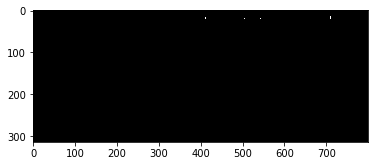

In [8]:
out = cv2.morphologyEx(A3, cv2.MORPH_HITMISS, modx)
showG(out)

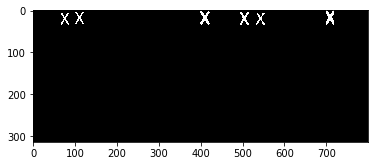

In [9]:
showG(mp.binary_dilation(out, x))

In [10]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

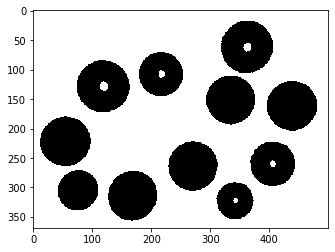

In [11]:
im4 = imread('money_bin.jpg')
g4 = Iops.grayscale(im4)
A4 = np.array(g4)
A4 = np.round(np.array(im4) / np.max(np.array(im4))).astype(np.int)
A4 = np.array((A4),dtype="uint8")
showG(A4)

In [12]:
def get2kr(pad = 0):
    return np.pad(A4[71:146, 180:255], pad,mode='constant')

In [13]:
kr2 = get2kr(pad=0)
print(kr2.shape)

(75, 75)


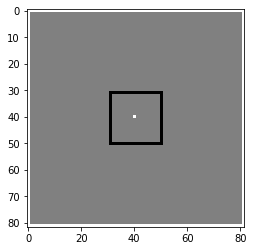

(82, 82)
1


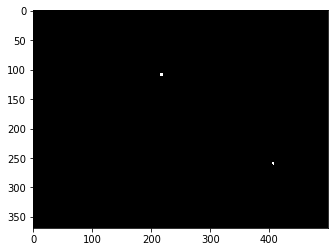

52


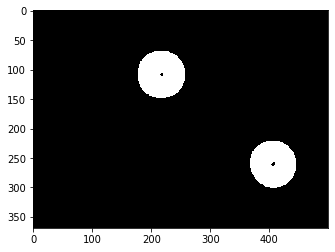

In [392]:
#2kr
m = np.full((80,80),0)
start, stop = 30,50
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[39:40,39:40] = 1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

showG(mp.binary_dilation(out, 1-kr2))

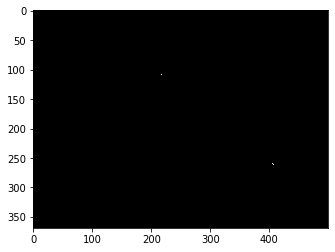

7
1
(array([259]), array([406]))


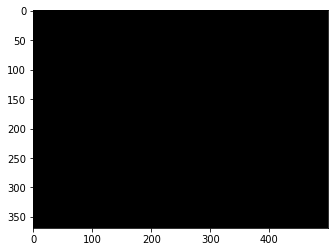

4323


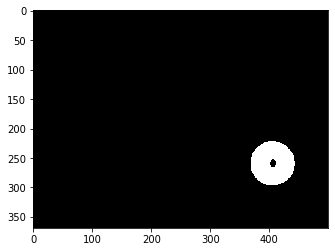

In [449]:
dia = mp.thin(out,8)
showG(dia)

print(np.sum(dia))
dia = mp.binary_erosion(dia, np.array([[0,0,0],[1,1,0],[0,0,0]]))
print(np.sum(dia))
print(np.where(dia==1))
plt.imshow(dia,cmap='gray')
plt.show()
dia = mp.binary_dilation(dia, 1-get2kr())
print(np.sum(dia))
plt.imshow(dia,cmap='gray')
plt.show()

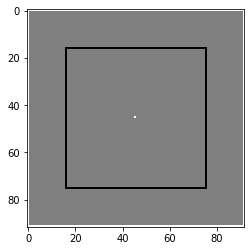

(92, 92)
1


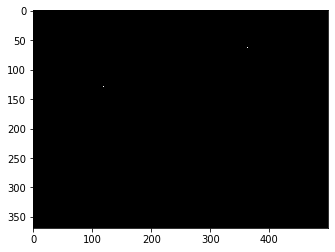

7


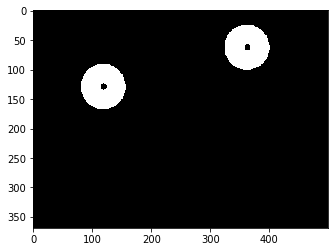

In [340]:
#5kr
m = np.full((90,90),0)
start, stop = 15,75
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[44:45,44:45] = 1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

showG(mp.binary_dilation(out, 1-kr2))

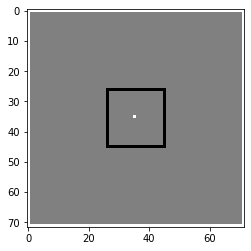

(72, 72)
1


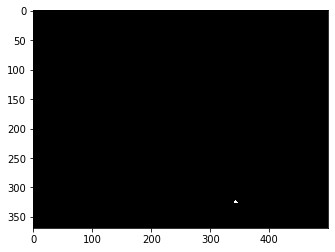

22


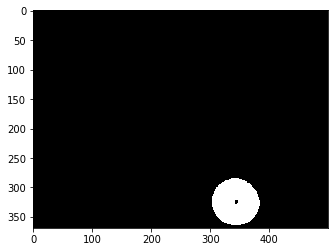

In [345]:
#1kr
m = np.full((70,70),0)
start, stop = 25,45
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[34:35,34:35] = 1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

showG(mp.binary_dilation(out, 1-kr2))

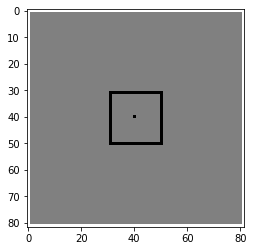

(82, 82)
1


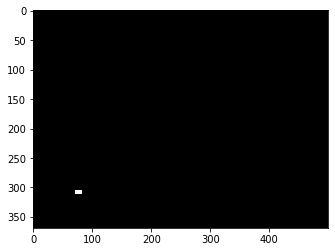

84


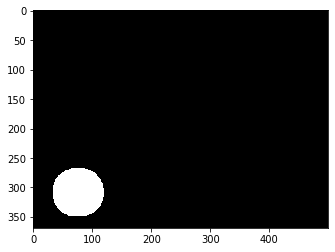

In [354]:
#50øre
m = np.full((80,80),0)
start, stop = 30,50
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[39:40,39:40] = -1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

showG(mp.binary_dilation(out, 1-kr2))

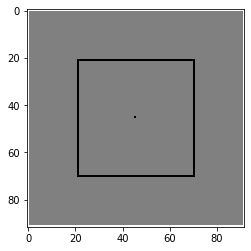

(92, 92)
1


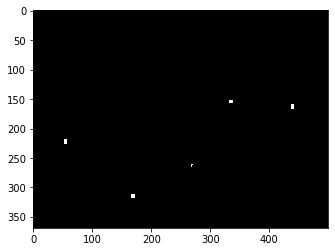

152


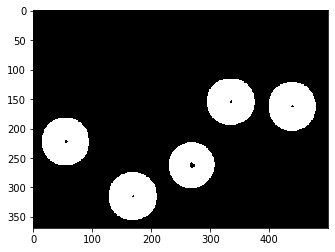

In [364]:
#20kr
m = np.full((90,90),0)
start, stop = 20,70
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[44:45,44:45] = -1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

showG(mp.binary_dilation(out, 1-kr2))

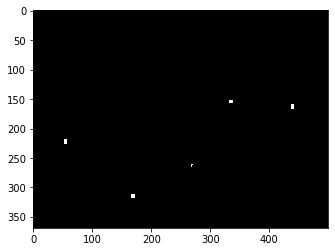

1


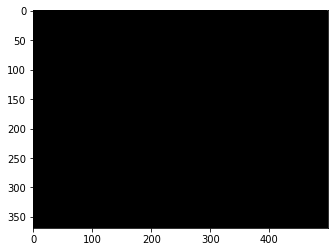

In [390]:
res = mp.skeletonize(out)
showG(out)
res = mp.binary_erosion(res, np.array([[1,1,1],[0,0,1],[0,0,1]]))
print(np.sum(res))
showG(res)

In [14]:
def count_regions(mod, radius, foreground = 1):
    mod = np.array(mod)
    x_max = mod.shape[0]
    y_max = mod.shape[1]
    s = 0
    blobs = np.argwhere(mod == foreground)
    while len(blobs) > 0:
        x,y = blobs[0]
        mod[max(0,x-radius):min(x+radius, x_max),max(0,y-radius):min(y+radius, y_max)] = 0
        s += 1
        blobs = np.argwhere(mod == foreground)
    return s

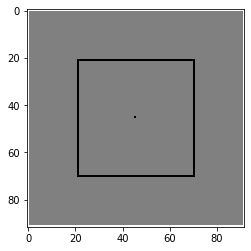

(92, 92)
1


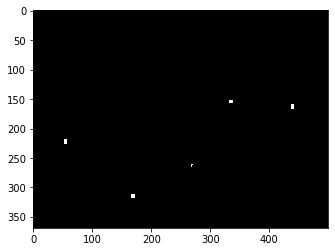

152
5


In [17]:
#20kr
m = np.full((90,90),0)
start, stop = 20,70
m[start:stop,start:stop] = -1
m[start+1:stop-1,start+1:stop-1] = 0
m[44:45,44:45] = -1
m = np.pad(m,1,'constant',constant_values=1)
plt.imshow(m,cmap='gray')
plt.show()
print(m.shape)
print(m[0,0])

out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
showG(out)
print(np.sum(out))

print(count_regions(out, 20))

In [24]:
m05 = np.full((80,80),0)
start, stop = 30,50
m05[start:stop,start:stop] = -1
m05[start+1:stop-1,start+1:stop-1] = 0
m05[39:40,39:40] = -1
m05 = np.pad(m05,1,'constant',constant_values=1)

m1 = np.full((70,70),0)
start, stop = 25,45
m1[start:stop,start:stop] = -1
m1[start+1:stop-1,start+1:stop-1] = 0
m1[34:35,34:35] = 1
m1 = np.pad(m1,1,'constant',constant_values=1)

m2 = np.full((80,80),0)
start, stop = 30,50
m2[start:stop,start:stop] = -1
m2[start+1:stop-1,start+1:stop-1] = 0
m2[39:40,39:40] = 1
m2 = np.pad(m2,1,'constant',constant_values=1)

m5 = np.full((90,90),0)
start, stop = 15,75
m5[start:stop,start:stop] = -1
m5[start+1:stop-1,start+1:stop-1] = 0
m5[44:45,44:45] = 1
m5 = np.pad(m5,1,'constant',constant_values=1)

m20 = np.full((90,90),0)
start, stop = 20,70
m20[start:stop,start:stop] = -1
m20[start+1:stop-1,start+1:stop-1] = 0
m20[44:45,44:45] = -1
m20 = np.pad(m20,1,'constant',constant_values=1)

def count_coins(im):
    s = 0
    masks = [m05,m1,m2,m5,m20]
    values = [0.5,1,2,5,20]
    mask_values = zip(masks,values)
    
    for m,v in mask_values:
        out = cv2.morphologyEx(A4, cv2.MORPH_HITMISS, m)
        n = count_regions(out, 20)
        s += n*v
    return s

115.5


In [23]:
masks = [m05,m1,m2,m5,m20]
values = [0.5,1,2,5,20]
z = zip(masks,values)
for m,v in z:
    print(v)

0.5
1
2
5
20
